# Preprocess Data

In [ ]:
import tensorflow as tf
import os
import numpy as np
import warnings
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/covid_dataset/'
target_var = os.listdir(data_dir)
target_var

['normal', 'covid']

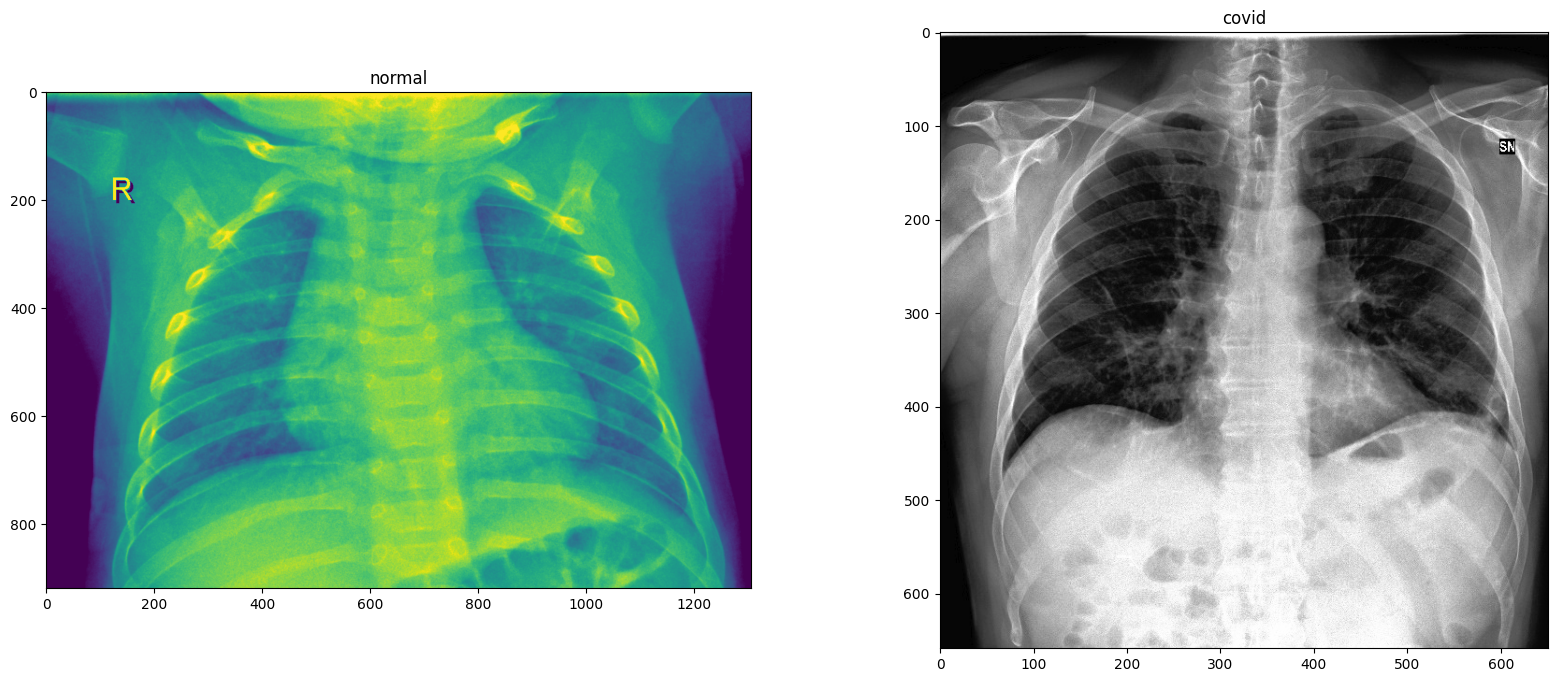

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
for i in range(len(target_var)):
    d = data_dir+target_var[i]+'/'+os.listdir(data_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.show()

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1478 files belonging to 2 classes.


In [ ]:
batch_size = 32
len(data)

47

# Data Split

In [ ]:
train_size = int(len(data)* .7)
valid_size = int(len(data)* .2) + 1
test_size = int(len(data)* .1) + 1
train_size + valid_size + test_size

47

In [ ]:
train = data.take(train_size)
valid = data.skip(train_size).take(valid_size)
test = data.skip(train_size).skip(valid_size).take(test_size)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
covid_model = tf.keras.Sequential([
    layers.Input(shape=(256, 256, 3)),
])

In [ ]:
covid_model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
covid_model.add(MaxPooling2D())

covid_model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
covid_model.add(MaxPooling2D())

covid_model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
covid_model.add(MaxPooling2D())

covid_model.add(Flatten())

covid_model.add(Dense(256, activation='relu'))
covid_model.add(Dense(1, activation='sigmoid'))

In [ ]:
covid_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
covid_model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = covid_model.fit(
    train,
    validation_data=valid,
    epochs=5)

Epoch 1/5
32/32 [==============================] - 121s 4s/step - loss: 30.2778 - accuracy: 0.8223 - val_loss: 0.0918 - val_accuracy: 0.9750
Epoch 2/5
32/32 [==============================] - 120s 4s/step - loss: 0.0811 - accuracy: 0.9648 - val_loss: 0.0713 - val_accuracy: 0.9812
Epoch 3/5
32/32 [==============================] - 122s 4s/step - loss: 0.0472 - accuracy: 0.9844 - val_loss: 0.0659 - val_accuracy: 0.9781
Epoch 4/5
32/32 [==============================] - 119s 4s/step - loss: 0.0404 - accuracy: 0.9844 - val_loss: 0.0611 - val_accuracy: 0.9781
Epoch 5/5
32/32 [==============================] - 118s 4s/step - loss: 0.0117 - accuracy: 0.9951 - val_loss: 0.0258 - val_accuracy: 0.9906


# Model Stats

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = covid_model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 90ms/step


In [ ]:
print(f'Accuracy: {accuracy.result().numpy()}, Precision:{precision.result().numpy()}, Recall: {recall.result().numpy()}')

Accuracy: 0.9850746393203735, Precision:0.9918699264526367, Recall: 0.9918699264526367


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

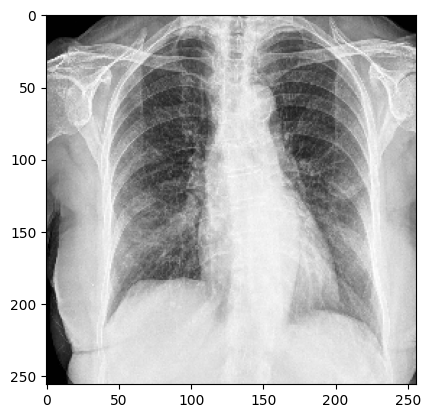

In [ ]:
img_path = '/content/drive/MyDrive/covid_dataset/covid/04.png'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
plt.imshow(img)
plt.show()

In [ ]:
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
img_array = preprocess_input(img_array)

In [ ]:
predictions = covid_model.predict(img_array)
predictions

1/1 [==============================] - 0s 34ms/step


array([[0.06851658]], dtype=float32)

In [ ]:
if predictions > 0.5:
  print("Predicted as normal")
else:
  print("Predicted as covid")

Predicted as covid


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
covid_model.save('drive/MyDrive/trainedModels/covidModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
covid_model.save('drive/MyDrive/trainedModels/covidModel.keras')

In [ ]:
new_model = load_model('drive/MyDrive/trainedModels/covidModel.h5')

In [ ]:
new_model.predict(img_array)

1/1 [==============================] - 0s 97ms/step


array([[0.06851658]], dtype=float32)